In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!git clone https://github.com/Sricharan0509/Doc-Scanner-with-OpenCV-OCR-
%cd Doc-Scanner-with-OpenCV-OCR-

#**Get import basic libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 
import pytesseract
from google.colab.patches import cv_imshow
%matplotlib inline

##Read Image

In [7]:
img = cv.imread('bill02.jpg')
print(img.shape)

(1280, 960, 3)


## Resizing the image

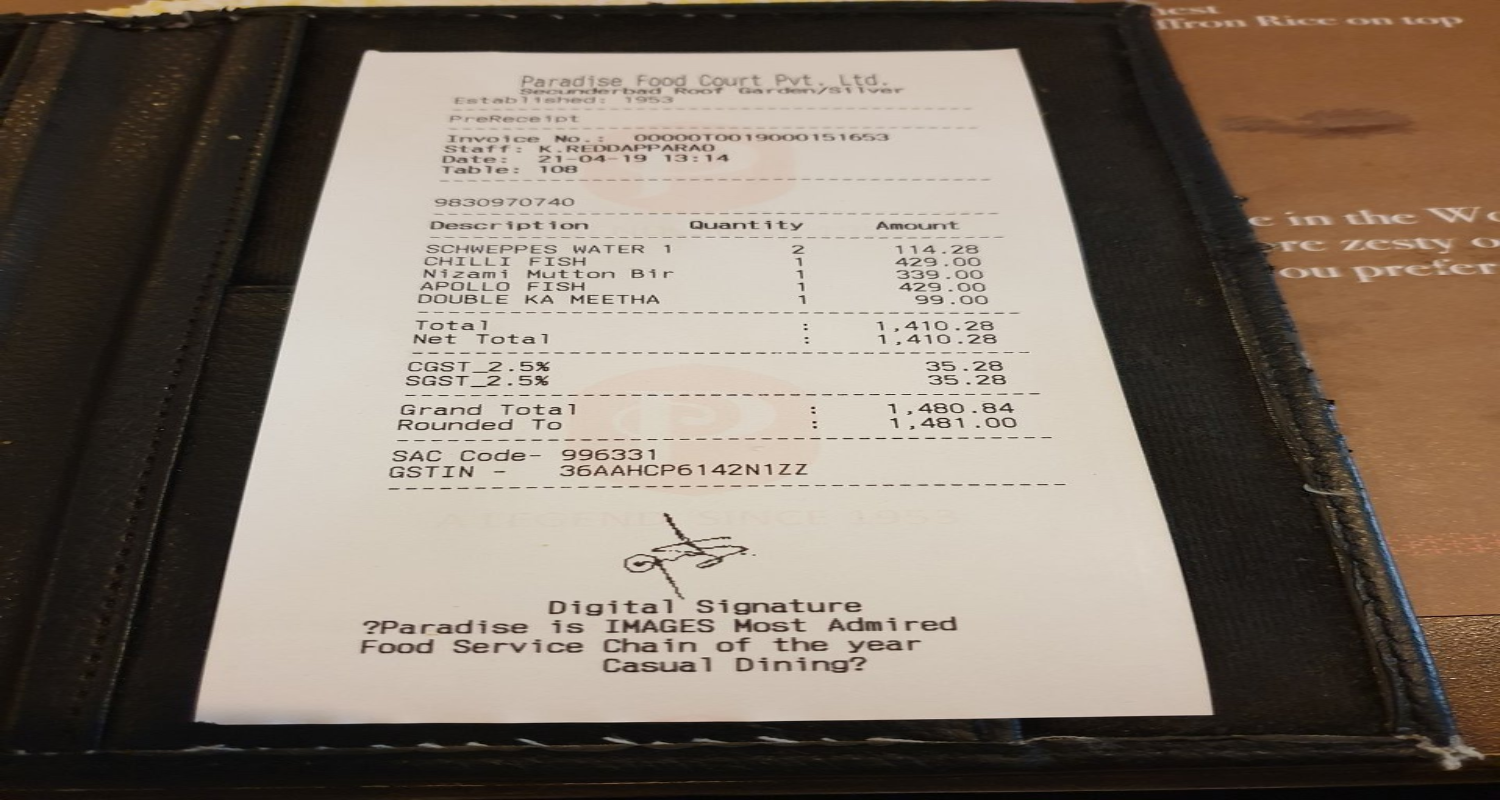

In [8]:
img=cv.resize(img,(1500,800))
cv_imshow(img)

## Remove the Noise by Image Blurring

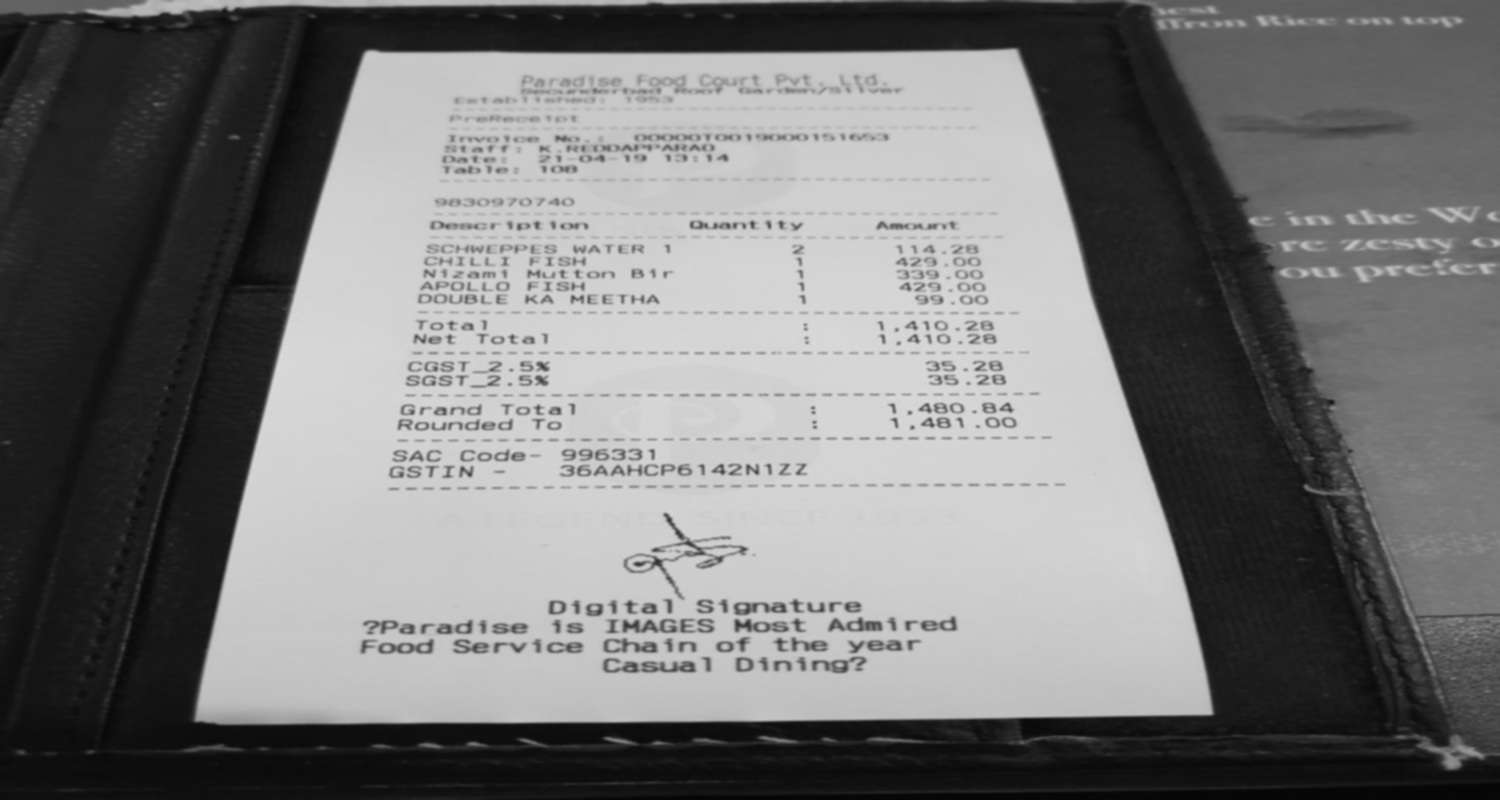

In [9]:
orig = img.copy()
gray = cv.cvtColor(orig,cv.COLOR_BGR2GRAY)
#cv_imshow(gray)

blurred = cv.GaussianBlur(gray,(5,5),0)
cv_imshow(blurred)

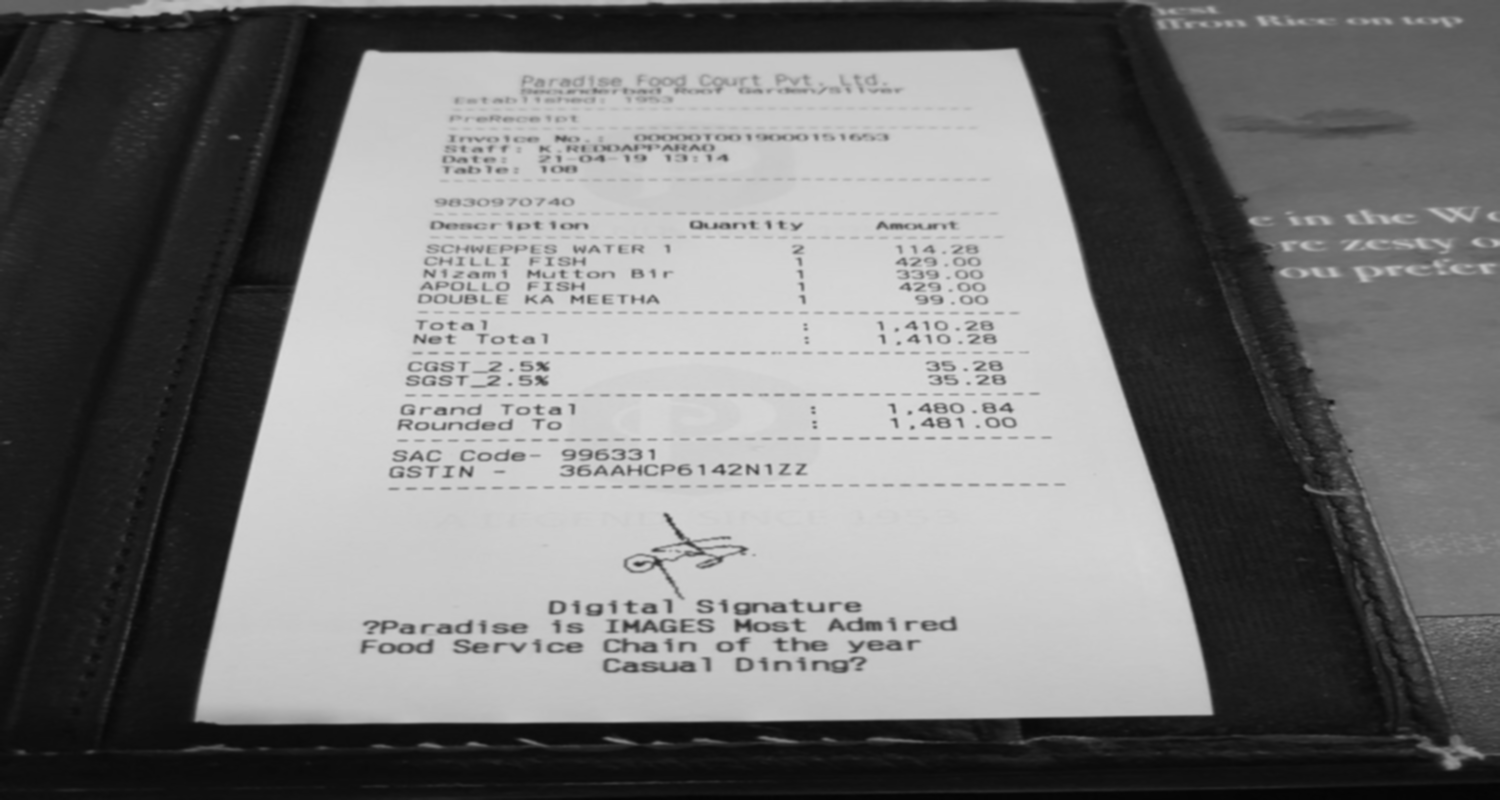

In [10]:
regen = cv.cvtColor(blurred,cv.COLOR_GRAY2BGR)
#cv_imshow(orig)
cv_imshow(regen)

## Edge Detection

			EDGE DETECTION


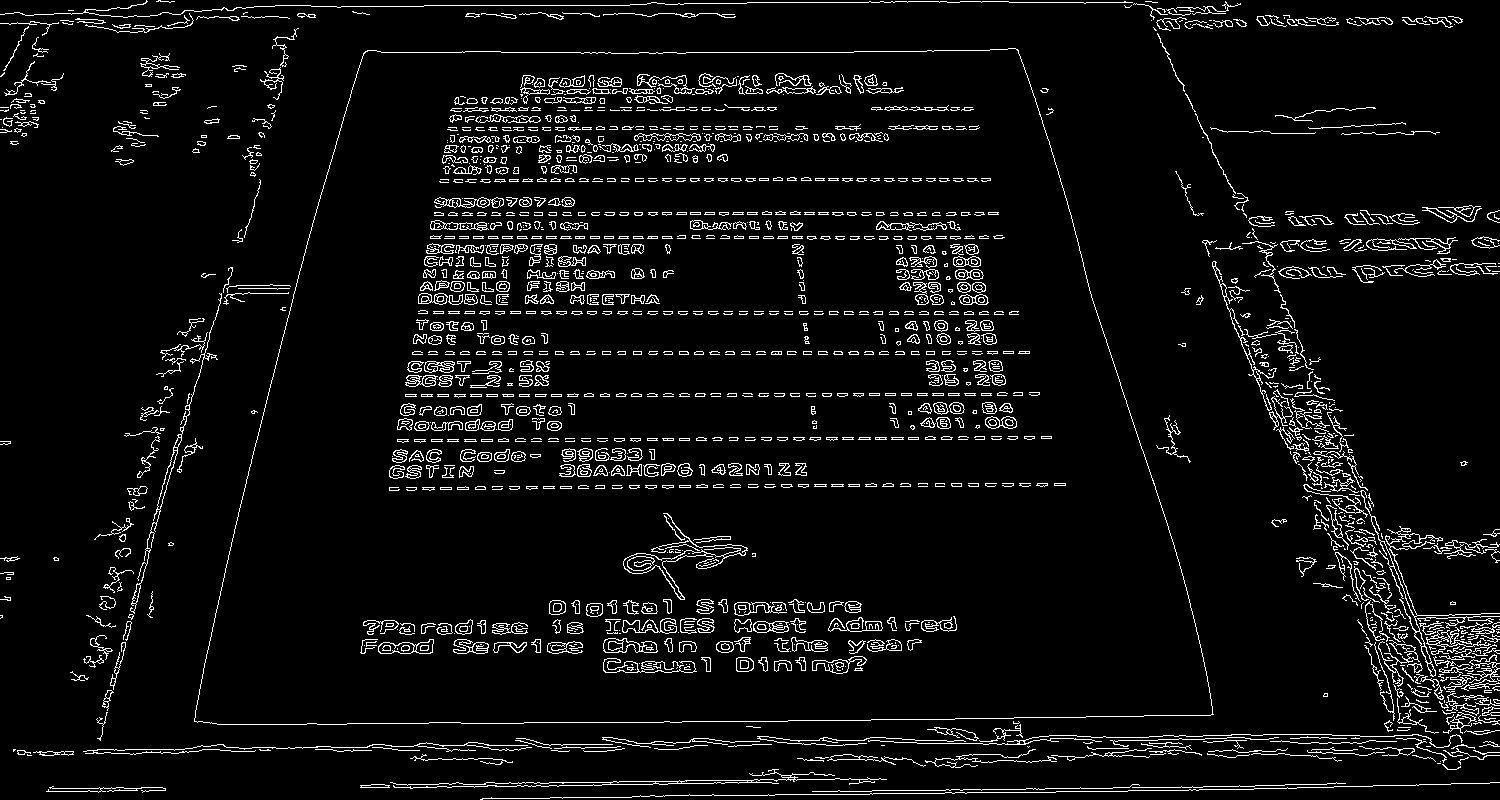

In [11]:
edge = cv.Canny(blurred,0,50)
orig_edge = edge.copy()
print("\t\t\tEDGE DETECTION")
cv_imshow(orig_edge)

## Contours Extraction

In [12]:
contours,_ = cv.findContours(edge,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse = True, key = cv.contourArea)

2731


## Select the best Contour Region

In [13]:
for c in contours:

  p = cv.arcLength(c,True)
  
  approx=cv.approxPolyDP(c,0.02*p, True)

  if len(approx) == 4:
    target = approx
    break

print(target.shape)

(4, 1, 2)


## Reorder Target Contours

In [14]:
def reorder(h):

  h = h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype = np.float32)

  add = h.sum(axis =1)
  hnew[3] = h[np.argmin (add)]
  hnew[1] = h[np.argmax(add)]

  diff = np.diff(h, axis = 1)
  hnew[0] = h[np.argmin(diff)]
  hnew[2] = h[np.argmax(diff)]

  return hnew

In [15]:
reorder = reorder(target)
print("*********")
print(reorder)

[[1018   50]
 [ 365   51]
 [ 194  721]
 [1213  714]]
*********
[[1018.   50.]
 [1213.  714.]
 [ 194.  721.]
 [ 365.   51.]]


## Project to a Fixed Screen

In [16]:
input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [17]:
M = cv.getPerspectiveTransform(input_representation,output_map)

ans = cv.warpPerspective(orig, M, (800,800))
rot_ans=cv.rotate(ans,cv.ROTATE_90_CLOCKWISE)


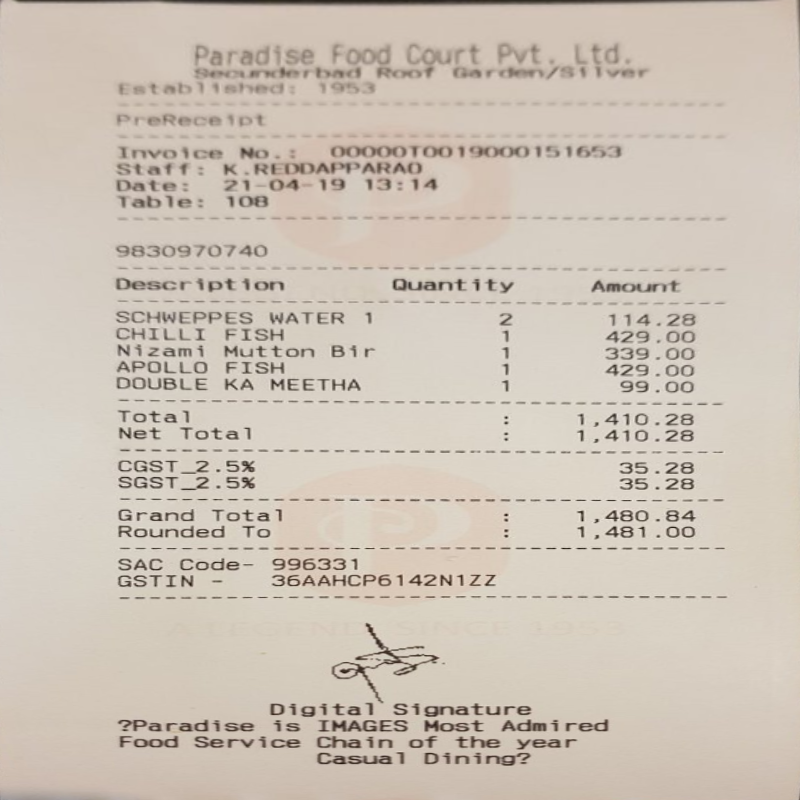

In [18]:
cv_imshow(rot_ans)